In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# State acronym dictionary
state_dict = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [3]:
# Read in Senate csv, combine First and Last, and set State acronym based on dictionary
senate = pd.read_csv("../senate_info_name_cleaned.csv")
senate["First Last"] = senate["First_Actual"] + " " + senate["Last"]
senate['State Acronym'] = senate['State'].map(state_dict)

In [4]:
# Read in contribution csv and fill in null values of honoree name
df = pd.read_csv("../lda_senate/lda_senate_output/2022page1-1429.csv")
df["honoree_name"] = df["honoree_name"].fillna("")

In [5]:
# Get total amount and add as column to senate
for index, row in senate.iterrows():
            print(index)
            total_amount = 0
            # search for the full name in the search df
            search_result = df[df['honoree_name'].str.contains(row["First Last"],case=False)]
            # calculate the total amount
            total_amount = search_result['amount'].sum()
            # append the total amount to the list
            senate.at[index,"Total Amount"] = total_amount

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
# Get total amount FROM OTHER STATES and add as column to senate
for index, row in senate.iterrows():
            print(index)
            total_amount = 0
            # search for the full name in the search df
            search_result = df[df['honoree_name'].str.contains(row["First Last"],case=False) & 
                               (df["state"]!=row["State Acronym"]) &
                               (df["state"]!="DC")]
            # calculate the total amount
            total_amount = search_result['amount'].sum()
            # append the total amount to the list
            senate.at[index,"Total Amount from Other States"] = total_amount

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
# Get total amount from DC and add as column to senate
for index, row in senate.iterrows():
            print(index)
            total_amount = 0
            # search for the full name in the search df
            search_result = df[df['honoree_name'].str.contains(row["First Last"],case=False) & (df["state"]=="DC")]
            # calculate the total amount
            total_amount = search_result['amount'].sum()
            # append the total amount to the list
            senate.at[index,"Total Amount from DC"] = total_amount

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [8]:
# Get total amount from In State and out of DC and add as column to senate
for index, row in senate.iterrows():
            print(index)
            total_amount = 0
            # search for the full name in the search df
            search_result = df[df['honoree_name'].str.contains(row["First Last"],case=False) & (df["state"]==row["State Acronym"])]
            # calculate the total amount
            total_amount = search_result['amount'].sum()
            # append the total amount to the list
            senate.at[index,"Total Amount from within State"] = total_amount

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [13]:
senate[["Name","Party","State Acronym","Total Amount","Total Amount from Other States","Total Amount from DC", "Total Amount from within State"]]

,Name,Party,State Acronym,Total Amount,Total Amount from Other States,Total Amount from DC,Total Amount from within State
0,"Budd, Ted",Republican,NC,617763.90,188850.0,413923.90,14990.0
1,"Warren, Elizabeth",Democratic,MA,0.00,0.0,0.00,0.0
2,"Whitehouse, Sheldon",Democratic,RI,123350.00,28000.0,94350.00,1000.0
3,"Young, Todd",Republican,IN,1133276.54,546275.0,563601.54,23400.0
4,"Welch, Peter",Democratic,VT,487716.58,153600.0,334116.58,0.0
...,...,...,...,...,...,...,...
418,"Gregg, Judd",Republican,NH,0.00,0.0,0.00,0.0
419,"Grams, Rod",Republican,MN,0.00,0.0,0.00,0.0
420,"Gramm, Phil",Republican,TX,0.00,0.0,0.00,0.0
421,"Gore, Albert,",Democratic,TN,0.00,0.0,0.00,0.0


In [10]:
# Create values to use in pie chart
total_amount_sum = senate["Total Amount"].sum()
other_states_sum = senate["Total Amount from Other States"].sum()
dc_sum = senate["Total Amount from DC"].sum()
within_state_sum = senate["Total Amount from within State"].sum()
other_states_percent = other_states_sum / total_amount_sum
dc_percent = dc_sum / total_amount_sum
within_state_percent = within_state_sum / total_amount_sum
print(other_states_percent)
print(dc_percent)
print(within_state_percent)

0.3103234708157016
0.6596274587301028
0.030049070454195588


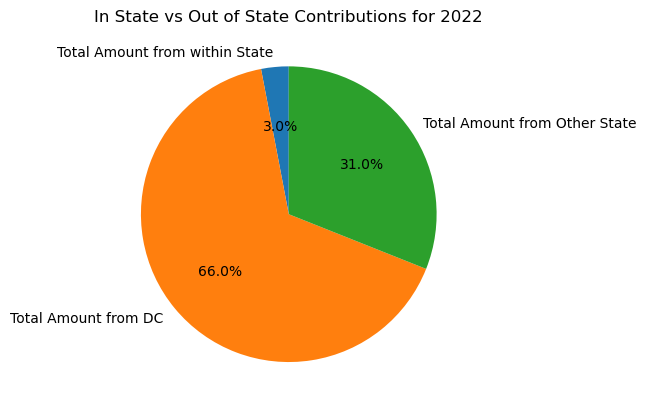

In [11]:
# Create pie chart
labels = ["Total Amount from within State","Total Amount from DC","Total Amount from Other State"]
sizes = [within_state_percent,dc_percent,other_states_percent]

plt.pie(sizes,labels=labels,autopct="%1.1f%%",startangle=90)

plt.title("In State vs Out of State Contributions for 2022")

plt.show()